# Exploring Offensive Trends in the NFL (2003-2023)

## Introduction

In this project, we will analyze NFL team data spanning from 2003 to 2023 to explore offensive trends in the league over the past two decades. By examining various offensive statistics such as points scored, passing yards, rushing yards, and turnovers, we aim to identify trends and patterns that have emerged over the years. This analysis can provide valuable insights into how offensive strategies have evolved in the NFL and shed light on factors influencing team performance.

## Data Acquisition

- We will start by loading the NFL team data for the years 2003 to 2023.
- The dataset contains various offensive statistics for each NFL team, including wins, losses, points scored, passing yards, rushing yards, turnovers, and more.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Acquisition
df = pd.read_csv("team_stats_2003_2023.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   year                  team  wins  losses  win_loss_perc  points  \
0  2003  New England Patriots    14       2          0.875     348   
1  2003        Miami Dolphins    10       6          0.625     311   
2  2003         Buffalo Bills     6      10          0.375     243   
3  2003         New York Jets     6      10          0.375     283   
4  2003      Baltimore Ravens    10       6          0.625     391   

   points_opp  points_diff  mov   g  ...  rush_td  rush_yds_per_att  rush_fd  \
0         238          110  6.9  16  ...        9               3.4       91   
1         261           50  3.1  16  ...       14               3.7       99   
2         279          -36 -2.3  16  ...       13               3.9       96   
3         299          -16 -1.0  16  ...        8               4.0       78   
4         281          110  6.9  16  ...       18               4.8      115   

   penalties  penalties_yds  pen_fd  score_pct  turnover_pct  exp_p

## Data Cleaning

- We will perform data cleaning tasks such as handling missing values, checking data types, and ensuring consistency across the dataset.
- This step is crucial to ensure the accuracy and reliability of our analysis.

In [2]:
# 1. Handling Missing Values

# For the 'mov' column, we can impute missing values with the median
median_mov = df['mov'].median()
df['mov'].fillna(median_mov, inplace=True)

# For the 'ties' column, we can impute missing values with 0
df['ties'].fillna(0, inplace=True)

# Verify if missing values have been handled
missing_values_after = df.isnull().sum()
print("Missing Values After Handling:\n", missing_values_after)

# 2. Standardizing Column Names
# Convert column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(" ", "_")

# 3. Data Type Conversion
# Check data types of each column
print("Data Types:\n", df.dtypes)

# 4. Removing Duplicates
# Remove duplicate rows
df.drop_duplicates(inplace=True)

Missing Values After Handling:
 year                    0
team                    0
wins                    0
losses                  0
win_loss_perc           0
points                  0
points_opp              0
points_diff             0
mov                     0
g                       0
total_yards             0
plays_offense           0
yds_per_play_offense    0
turnovers               0
fumbles_lost            0
first_down              0
pass_cmp                0
pass_att                0
pass_yds                0
pass_td                 0
pass_int                0
pass_net_yds_per_att    0
pass_fd                 0
rush_att                0
rush_yds                0
rush_td                 0
rush_yds_per_att        0
rush_fd                 0
penalties               0
penalties_yds           0
pen_fd                  0
score_pct               0
turnover_pct            0
exp_pts_tot             0
ties                    0
dtype: int64
Data Types:
 year                      int64


## Exploratory Data Analysis (EDA)

- We will conduct exploratory data analysis to gain insights into offensive trends over the years.
- This will involve visualizing key offensive metrics such as points scored, passing yards, rushing yards, and turnovers over time.
- Additionally, we will examine correlations between different offensive statistics to identify potential relationships.


Summary Statistics:
              year        wins      losses  win_loss_perc      points  \
count   672.000000  672.000000  672.000000     672.000000  672.000000   
mean   2013.000000    8.050595    8.050595       0.500246  358.633929   
std       6.059811    3.093255    3.086020       0.191452   72.092050   
min    2003.000000    0.000000    0.000000       0.000000  168.000000   
25%    2008.000000    6.000000    6.000000       0.375000  305.000000   
50%    2013.000000    8.000000    8.000000       0.500000  359.000000   
75%    2018.000000   10.000000   10.000000       0.625000  406.000000   
max    2023.000000   16.000000   16.000000       1.000000  606.000000   

       points_opp  points_diff         mov           g  total_yards  ...  \
count  672.000000   672.000000  672.000000  672.000000   672.000000  ...   
mean   358.633929     0.000000   -0.000595   16.139881  5463.895833  ...   
std     57.889328   100.684601    4.566126    0.347122   628.209466  ...   
min    201.000000

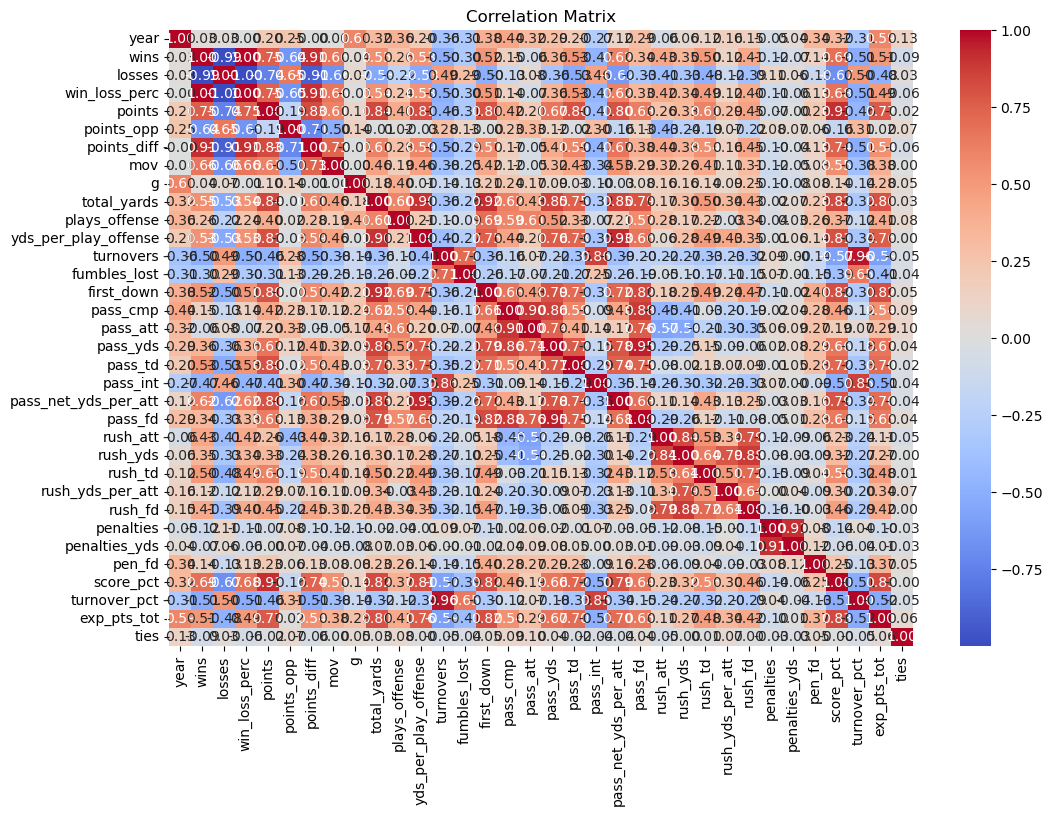

In [3]:
# Summary statistics
summary_stats = df.describe()
print("\nSummary Statistics:")
print(summary_stats)

# Select only numeric columns for correlation analysis
numeric_data = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

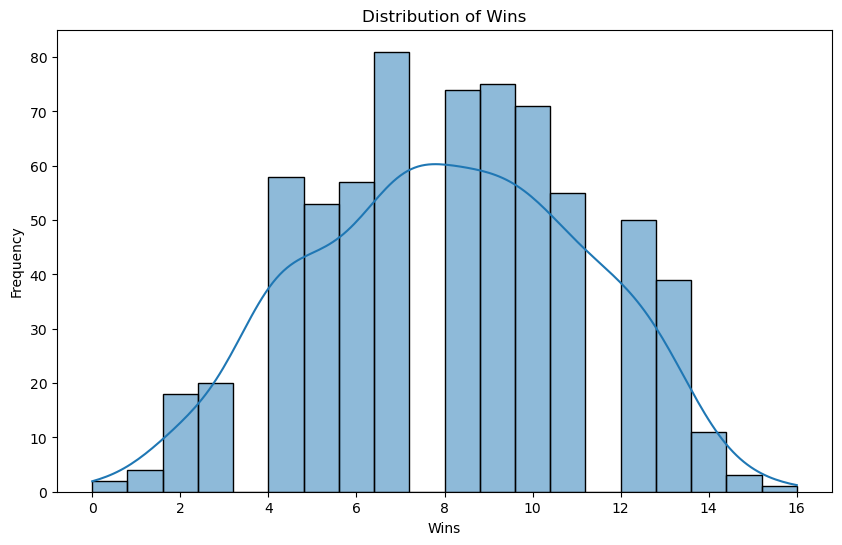

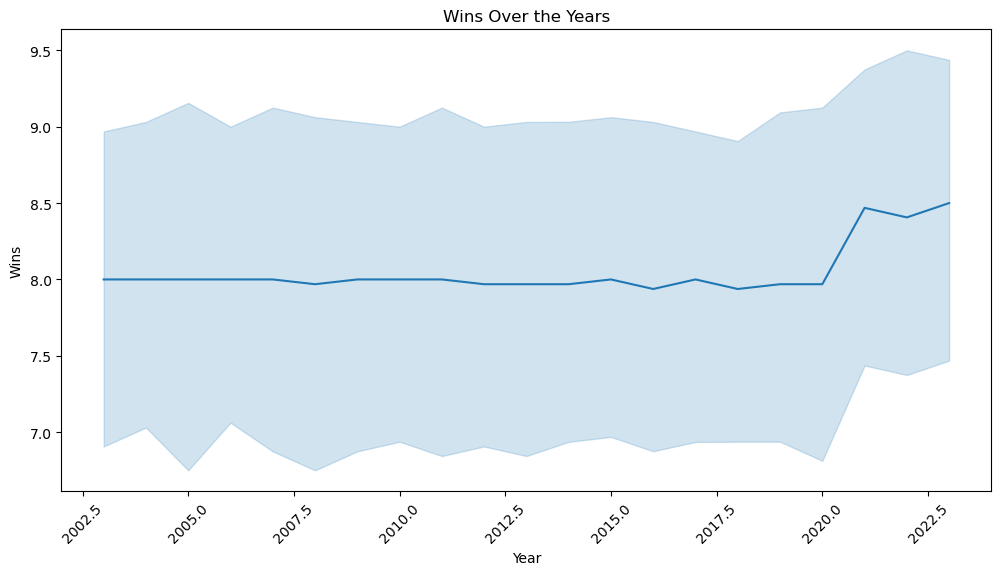

In [4]:
# Histogram of wins
plt.figure(figsize=(10, 6))
sns.histplot(df['wins'], bins=20, kde=True)
plt.title('Distribution of Wins')
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.show()

# Line plot of wins over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='wins', data=df)
plt.title('Wins Over the Years')
plt.xlabel('Year')
plt.ylabel('Wins')
plt.xticks(rotation=45)
plt.show()

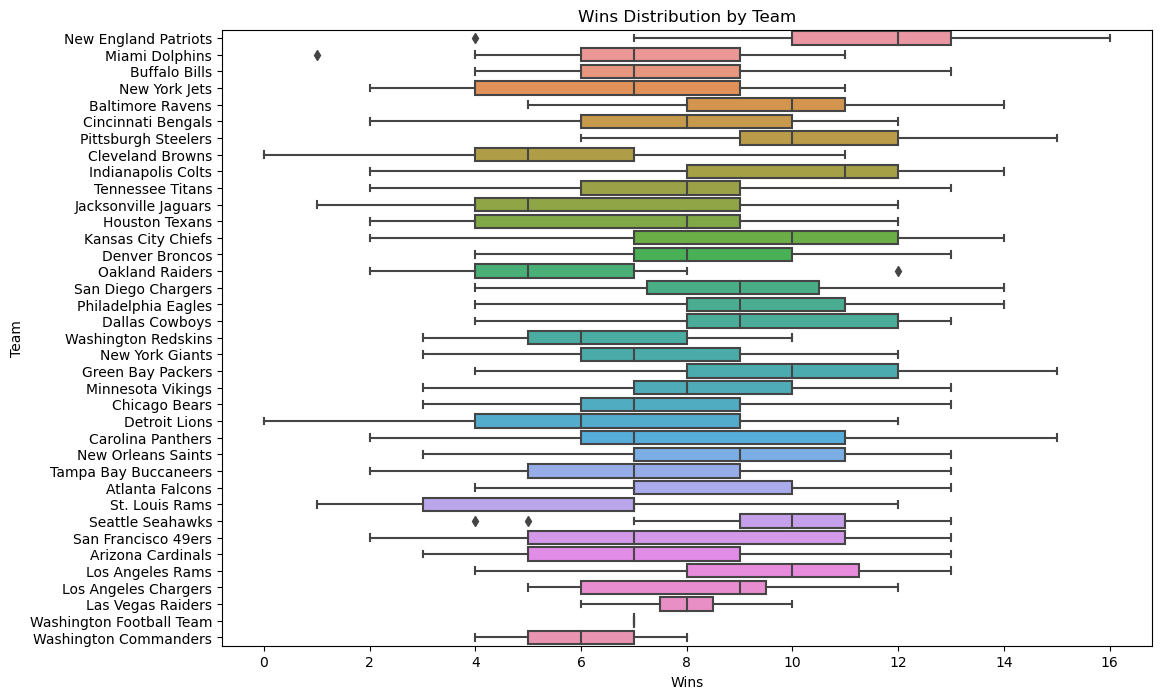

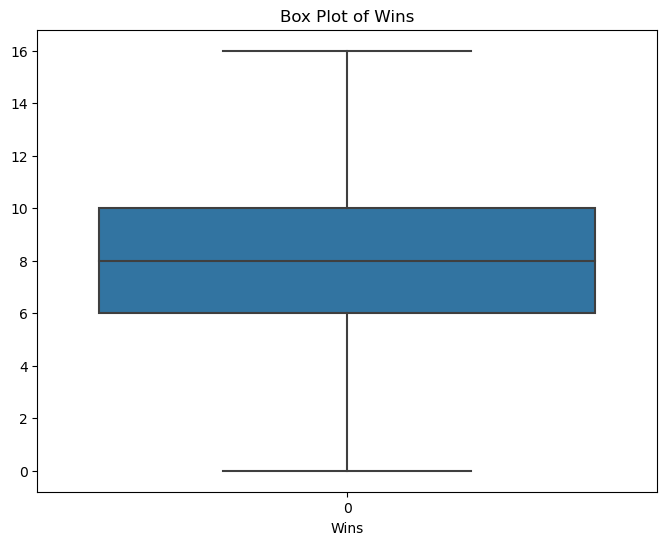

In [5]:
# Box plot of wins by team
plt.figure(figsize=(12, 8))
sns.boxplot(x='wins', y='team', data=df)
plt.title('Wins Distribution by Team')
plt.xlabel('Wins')
plt.ylabel('Team')
plt.show()

# Box plot of wins to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df['wins'])
plt.title('Box Plot of Wins')
plt.xlabel('Wins')
plt.show()

## Trend Analysis

- Based on our EDA findings, we will analyze trends and patterns in offensive performance across different seasons.
- We will identify notable changes or shifts in offensive strategies and performance metrics over the years.

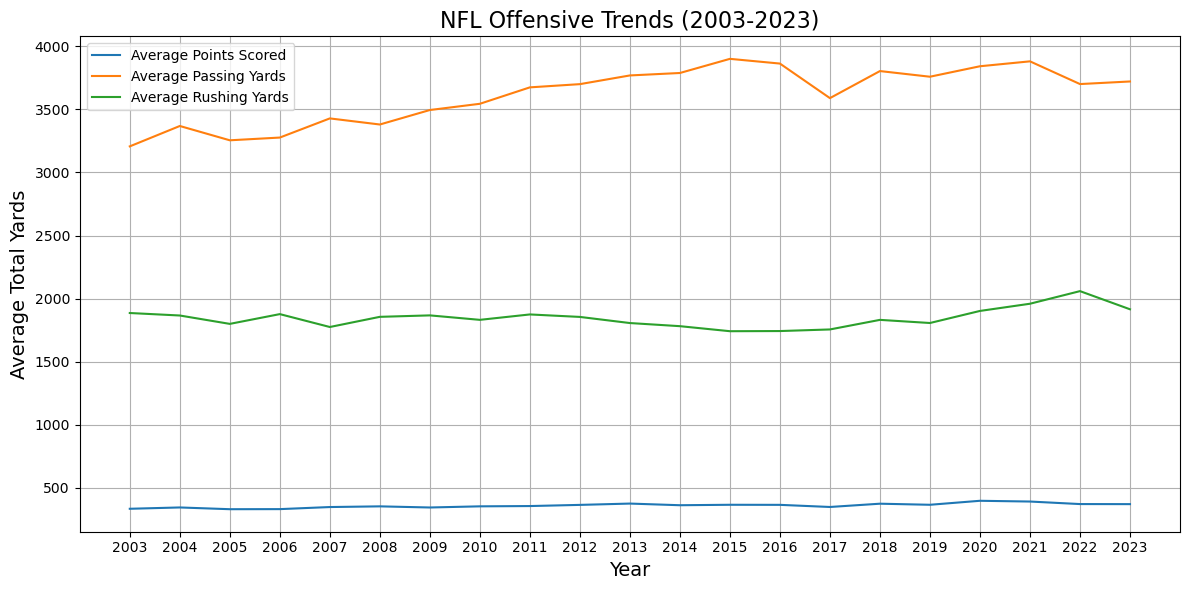

In [6]:
# Calculate average values for each category across all seasons
avg_points = df.groupby('year')['points'].mean()
avg_pass_yds = df.groupby('year')['pass_yds'].mean()
avg_rush_yds = df.groupby('year')['rush_yds'].mean()

# Plotting trends over time
plt.figure(figsize=(12, 6))
plt.plot(avg_points.index, avg_points, label='Average Points Scored')
plt.plot(avg_pass_yds.index, avg_pass_yds, label='Average Passing Yards')
plt.plot(avg_rush_yds.index, avg_rush_yds, label='Average Rushing Yards')

# Setting plot title and labels
plt.title('NFL Offensive Trends (2003-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Total Yards', fontsize=14)

# Setting ticks on x-axis from 2003 to 2023
plt.xticks(range(2003, 2024, 1))  # Start from 2003, end at 2023, increment by 1

# Display the plot
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Conclusion

The analysis of NFL offensive trends from 2003 to 2023 reveals interesting insights into the evolution of offensive strategies in professional football. While points scored and rushing yards have shown relative consistency over the years, passing yards have exhibited a clear increasing trend. This suggests a shift towards more emphasis on passing plays in modern NFL offenses.

## Future Directions

- Deep Dive into Passing Offenses: Further analysis could focus on understanding the factors driving the increase in passing yards. This could involve examining changes in quarterback performance, offensive play-calling tendencies, and rule changes favoring passing offenses.
- Impact of Rule Changes: Investigate the impact of rule changes implemented by the NFL over the years on offensive strategies. This could include changes related to pass interference rules, quarterback protections, and illegal contact penalties.
- Comparative Analysis: Conduct a comparative analysis of offensive trends across different NFL teams to identify variations in offensive strategies and their effectiveness. This could provide insights into the diversity of offensive approaches adopted by different teams.
- Predictive Modeling: Explore the use of predictive modeling techniques to forecast future offensive trends in the NFL. Machine learning algorithms could be trained on historical data to predict future changes in offensive strategies and performance metrics.
- Qualitative Analysis: Supplement quantitative analysis with qualitative insights from coaches, players, and analysts to gain a holistic understanding of offensive trends. Interviews, surveys, and expert opinions could provide valuable context and perspective.

## References

- Pro Football Reference (https://www.pro-football-reference.com/)
- Python documentation for data analysis libraries (Pandas, Matplotlib, Seaborn)